In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# 분류 (Classification)

## K Nearest Neighbors (k-최근접 이웃 분류 알고리즘)

가장 중요한 hyperparameter인 **K**값은 근처에 참고(reference)할 **이웃의 숫자**
- k-최근접 이웃 분류 알고리즘
- 가장 고전적이고 직관적인 머신러닝 분류 알고리즘
- 기하학적 거리 분류기
- 가장 **가깝게 위치하는 멤버로 분류**하는 방식

In [9]:
Image(url='https://miro.medium.com/max/405/0*QyWp7J6eSz0tayc0.png', width=500)


# '''
# 물음표와 가장 가깝게 만나는 지웃을 지정해서 boundary를 친다.


# k를 몇으로 정하느냐에 따라서 결과가 매우 달라진다.


# 물음표가 별인지 세모인지를 구분하면 된다.

# 이웃하는 데이터의 갯수가 홀수인지, 짝수인지에 따라서 알고리즘이 달라진다.

# 짝수일 때는, 거리상 가장 가까운 클래스가 물음표 안에 들어간다.
# 예를 들어 세모가 가장 가깝다고 한다면, 물음표는 세모이다.
# 홀수일 때는, 그 안에 갯수가 가장 많은 클래스가 물음표 안에 들어간다.
# 예를 들어 별이 가장 많다고 하면, 물음표는 별이다.

# 여기서 지정하는 k를 hyperparameter라고 한다.
# hyperparameter는 머신의 학습결과로 얻어지는 값이 아니라 인간의 경험치로 지정해줘야하는 값이다.
# hyperparameter를 무슨 값으로 지정해주냐에 따라 성능이 크게 달라진다. 이러한 것을 모델 튜닝이라고 한다.
# 딥러닝에서는 이러한 hyperparameter를 Art라고 한다.
# '''

## 더미 데이터를 활용한 분류 원리 이해

In [3]:
from sklearn.neighbors import KNeighborsClassifier

## mnist (손글씨) 데이터셋을 활용한 분류

mnist (손글씨) 데이터셋을 활용하여 0~9까지 분류하는 분류기를 만듭니다.

`sklearn.datasets` 보다 고해상도 이미지이기 때문에 `tensorflow.keras.datasets`을 활용합니다.

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(x_digit, y_digit), (_, _15) = mnist.load_data()
x_digit, y_digit = x_digit[:5000], y_digit[:5000]
x_digit = x_digit.reshape(-1, 28*28)
x_digit.shape

(5000, 784)

### mnist (손글씨) 데이터 시각화

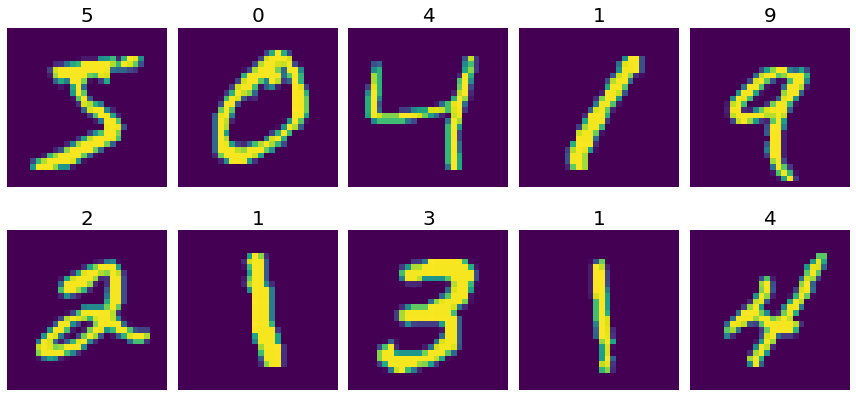

In [6]:
w, h = 2, 5
fig, axes = plt.subplots(w, h)
fig.set_size_inches(12, 6)
for i in range(w*h):
    axes[i//h, i%h].imshow(x_digit[i].reshape(-1, 28))
    axes[i//h, i%h].set_title(y_digit[i], fontsize=20)
    axes[i//h, i%h].axis('off')
plt.tight_layout()
plt.show()

## 데이터 셋 분할
학습용(train) 데이터셋과 검증 (혹은 테스트)용 데이터 셋을 분할 합니다.

In [7]:
from sklearn.model_selection import train_test_split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(x_digit, y_digit, stratify=y_digit, random_state=30, test_size=0.1)

In [12]:
X_train.shape, X_test.shape

((4500, 784), (500, 784))

### 모델 정의

`KNeighborsClassifier`를 정의 하고 핵심 hyperparameter 인 `n_neighbors`를 지정합니다.

임의로 5개의 이웃을 보도록 `n_neighbors=5`로 지정하겠습니다.

그리고, `n_jobs` 옵션은 학습에 사용할 코어의 숫자를 지정합니다. -1로 지정하면, 모든 코어를 사용하도록 합니다.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier(n_neighbors=5, n_jobs = -1) #k.... knn에서는 k를 입력하지 않으면 디폴트값이 5로 지정되어 있다.

In [17]:
knn

KNeighborsClassifier(n_jobs=-1)

### 학습 (fit)

In [18]:
# 지도학습이기에 X_train(data)과 y_train(label)을 같이 넣어준다.
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

### 예측 (predict)

In [20]:
pred = knn.predict(X_test)
pred

array([6, 2, 0, 5, 4, 1, 3, 4, 7, 0, 8, 6, 6, 0, 4, 1, 0, 8, 2, 4, 1, 1,
       7, 6, 0, 1, 1, 6, 1, 1, 2, 8, 7, 5, 6, 1, 4, 7, 0, 1, 2, 1, 2, 4,
       5, 4, 3, 0, 7, 3, 4, 7, 5, 4, 9, 4, 9, 0, 2, 4, 5, 2, 4, 7, 3, 6,
       9, 1, 7, 0, 5, 2, 7, 3, 9, 0, 1, 5, 6, 9, 4, 4, 9, 8, 9, 9, 1, 3,
       3, 9, 0, 9, 6, 3, 0, 5, 7, 0, 1, 8, 2, 6, 7, 0, 3, 9, 9, 9, 2, 5,
       1, 6, 1, 3, 7, 8, 8, 0, 5, 3, 6, 1, 4, 2, 4, 2, 4, 4, 3, 1, 3, 6,
       0, 8, 7, 2, 5, 4, 2, 8, 1, 4, 7, 2, 4, 2, 7, 2, 1, 7, 6, 4, 8, 4,
       8, 3, 4, 7, 2, 8, 8, 0, 6, 9, 8, 3, 6, 7, 2, 7, 2, 5, 0, 3, 2, 5,
       6, 7, 2, 9, 4, 7, 2, 5, 7, 1, 5, 3, 9, 6, 9, 2, 4, 5, 1, 5, 3, 8,
       9, 8, 6, 4, 4, 5, 0, 0, 8, 0, 8, 6, 6, 2, 0, 7, 9, 9, 9, 0, 1, 4,
       3, 5, 1, 2, 0, 9, 8, 7, 3, 9, 3, 7, 0, 2, 8, 2, 1, 6, 0, 5, 5, 1,
       6, 1, 2, 4, 7, 9, 0, 5, 6, 7, 3, 8, 7, 3, 0, 4, 2, 3, 6, 3, 8, 8,
       1, 6, 7, 9, 3, 3, 4, 0, 9, 2, 0, 9, 6, 4, 1, 6, 1, 6, 4, 1, 1, 7,
       5, 7, 2, 4, 9, 5, 2, 7, 6, 1, 4, 9, 9, 3, 9,

### 검증 (evaluation)

정확도 (Accuracy) 산출

In [23]:
#1. 
(pred == y_test).mean() # 전체중에서 몇프로 맞췄는지 퍼센트 내기

0.938

In [24]:
# 2. scroe()이용
# score가 안돌아가는 경우가 있어서 위의 방법을 사용하는 것이 낫다.
knn.score(X_test, y_test)

0.938

### 최적의 n_neighbors 찾기

In [27]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs= -1)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    
    print ('k : ', k, ', accuracy :', score)

k :  1 , accuracy : 0.956
k :  2 , accuracy : 0.95
k :  3 , accuracy : 0.946
k :  4 , accuracy : 0.938
k :  5 , accuracy : 0.938
k :  6 , accuracy : 0.934
k :  7 , accuracy : 0.934
k :  8 , accuracy : 0.936
k :  9 , accuracy : 0.928
k :  10 , accuracy : 0.928


## Iris 붓꽃 데이터셋을 활용한 실습

### 필요한 데이터셋 불러오기 (load_iris)

In [52]:
from sklearn.datasets import load_iris
iris = load_iris() #머신에 들어갈 때는 무조건 2차원 배열로 들어가야 한다.
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [53]:
import pandas as pd

### 데이터프레임 (DataFrame) 만들기

In [54]:
df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
df['target'] = iris['target']

In [56]:
X = df.iloc[:, :4]
y = df['target']

## 데이터 셋 분할
학습용(train) 데이터셋과 검증 (혹은 테스트)용 데이터 셋을 분할 합니다.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1234)


#### 잘 load가 되었는지 shape를 확인

In [58]:
X_train.shape, X_test.shape

((135, 4), (15, 4))

In [59]:
y_train.shape, y_test.shape

((135,), (15,))

### 모델 정의

In [60]:
knn = KNeighborsClassifier(n_jobs = -1)

### 학습 (fit)

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

### 예측하기

In [62]:
pred = knn.predict(X_test)

### 검증 (evaluation)

In [63]:
(pred == y_test).mean()

1.0

### 최적의 k 값 찾기

In [64]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    print(score)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
